In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Perform the following
*   Upload the dataset (housing.csv) in Google-Colab
*   Importing the dataset using Pandas library.
*   Find variables which are useful for prediction.


*   Split Dataset into Train and Test Set
*   Predict Using
  1.   Decision Tree
  2.   Random Forest


*   Use evaluation metrics?????




In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

In [ ]:
#loading dataset
df = pd.read_csv('drive/MyDrive/Colab Notebooks/housing - housing.csv')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78....
1,0.02729 0.00 7.070 0 0.4690 7.1850 61....
2,0.03237 0.00 2.180 0 0.4580 6.9980 45....
3,0.06905 0.00 2.180 0 0.4580 7.1470 54....
4,0.02985 0.00 2.180 0 0.4580 6.4300 58....


Boston House Price dataset has **14** features and their description is given as follows:


*   **CRIM** per capita crime rate by town
*   **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.
*   **INDUS** proportion of non-retail business acres per town
*   **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   **NOX** nitric oxides concentration (parts per 10 million)
*   **RM** average number of rooms per dwelling
*   **AGE** proportion of owner-occupied units built prior to 1940
*   **DIS** weighted distances to five Boston employment centres
*  **RAD** index of accessibility to radial highways
*   **TAX** full-value property-tax rate per dollar 10,000.
*   **PTRATIO** pupil-teacher ratio by town
*   **B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   **LSTAT** % lower status of the population
*   **MEDV** Median value of owner-occupied homes in $1000's


Here ***main thing*** to notice is that **MEDV** is the outcome variable which we need to predict and all other variables are predictor variables.

In [ ]:
name= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df = pd.read_csv('drive/MyDrive/Colab Notebooks/housing.csv',names=name)
df = pd.read_csv('drive/MyDrive/Colab Notebooks/housing - housing.csv',delim_whitespace=True,names=name)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#shape of our dataset
df.shape

(506, 14)

In [ ]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
#checking for missing data
df.isnull().sum()
#there is no missing value in the data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Finding variables which are useful for prediction**

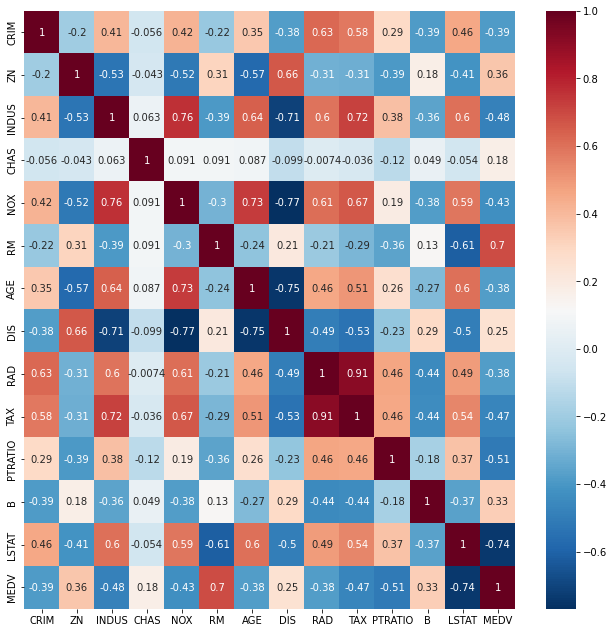

In [ ]:
# Let's plot correlation for the Loan prediction
fig, ax = plt.subplots(figsize=(11, 11))
correlations = df.corr()
# plotting correlation heatmap
dataplot = sns.heatmap(correlations, cmap="RdBu_r", annot=True)
# displaying heatmap
plt.show()

We observed that RM, TAX, PTRATIO and LSTAT shows some good correaltion with MEDV and I am interested to know more about them.

In [ ]:
#since some of these features shows quite good and very good correlation with our predictive variable Houese Price(MEDV)
df1 = df[['RM','TAX','PTRATIO','LSTAT','MEDV']]
df1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296.0,15.3,4.98,24.0
1,6.421,242.0,17.8,9.14,21.6
2,7.185,242.0,17.8,4.03,34.7
3,6.998,222.0,18.7,2.94,33.4
4,7.147,222.0,18.7,5.33,36.2


Now we have created a new dataset consisting of only those variables which we selected after analysing Heatmap.

## **Decision Tree Model**

In [ ]:
X_dt = df1.iloc[:,:-1].values
y_dt = df1.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(X_dt,y_dt,test_size=0.2,random_state=42)

print(f"Shape of X_train_dt = {X_train_dt.shape}")
print(f"Shape of X_test_dt = {X_test_dt.shape}")
print(f"Shape of y_train_dt = {y_train_dt.shape}")
print(f"Shape of y_test_dt = {y_test_dt.shape}")

Shape of X_train_dt = (404, 4)
Shape of X_test_dt = (102, 4)
Shape of y_train_dt = (404,)
Shape of y_test_dt = (102,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_dt,y_train_dt)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = dt.predict(X_test_dt)
y_pred_dt[:5]

array([22. , 33.1, 19.1, 27. , 14.9])

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test_dt, y_pred_dt)
R2

0.662457952837345

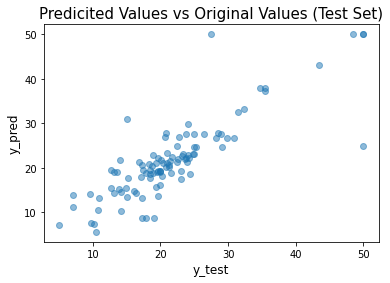

In [ ]:
plt.scatter(x=y_test_dt,y=y_pred_dt,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

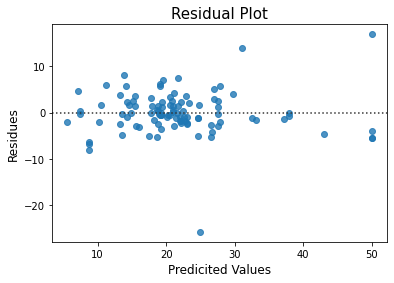

In [ ]:
sns.residplot(y_pred_dt,(y_pred_dt-y_test_dt))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

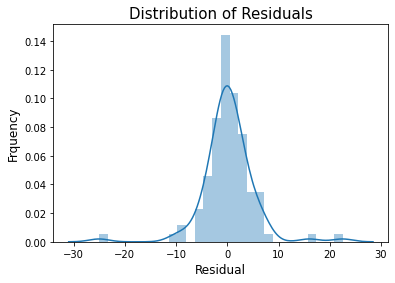

In [ ]:
sns.distplot(y_pred_dt-y_test_dt)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

In [ ]:
from sklearn import metrics
r2_dt= metrics.r2_score(y_test_dt,y_pred_dt)
N,p = X_test_dt.shape
adj_r2_dt = 1-((1-r2_dt)*(N-1))/(N-p-1)
print(f'R^2 = {r2_dt}')
print(f'Adjusted R^2 = {adj_r2_dt}')

R^2 = 0.662457952837345
Adjusted R^2 = 0.6485386931605345


In [ ]:
from sklearn import metrics
mse_dt = metrics.mean_squared_error(y_test_dt,y_pred_dt)
mae_dt = metrics.mean_absolute_error(y_test_dt,y_pred_dt)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_dt,y_pred_dt))
print(f'Mean Squared Error: {mse_dt}',f'Mean Absolute Error: {mae_dt}',f'Root Mean Squared Error: {rmse_dt}',sep='\n')

Mean Squared Error: 24.753235294117648
Mean Absolute Error: 3.100980392156863
Root Mean Squared Error: 4.9752623342008455


RANDOM FOREST MODEL

In [ ]:
X = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

In [ ]:
# Import Random Forest Regressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor(random_state=42)

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Model Fitting
y_pred = reg.predict(X_train)

In [ ]:
print("Training Accuracy: ",reg.score(X_train,y_train)*100)

Training Accuracy:  97.52139898484093


In [ ]:
print("Training Accuracy: ",reg.score(X_test,y_test)*100)

Training Accuracy:  80.84420164613648


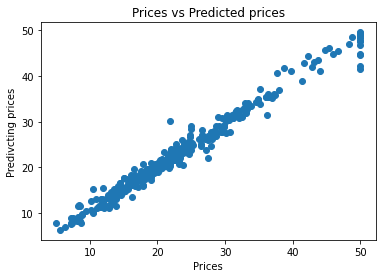

In [ ]:
#Predicting Scores
#Visualizing the difference between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predivcting prices")
plt.title("Prices vs Predicted prices")
plt.show()